In [2]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import wrf
import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/media/lucasdmarten/HD/backup/projetos/tcc/jupyter_scripts/data_ensemble.c1.csv')
df = df.drop('id',axis=1)
df.index = pd.to_datetime(df['times'])
d = {}
for i in range(1,10):
    Oij = []
    for wspd108 in  df[df['membro']==i].wspd108.values:
        if (wspd108 > 2) & (wspd108 <= 15):
            Oij.append(1)
            name='membro'+str(i)
        else:
            Oij.append(0)
            name='membro'+str(i)
    d.update({str(name):Oij})
previsão_probabilistica = ((np.array(d['membro1'])+np.array(d['membro2'])+np.array(d['membro3'])+np.array(d['membro4'])+np.array(d['membro5'])+np.array(d['membro6'])+np.array(d['membro7'])+np.array(d['membro8'])+np.array(d['membro9']))/9) * 100
list_date = pd.date_range('2018-05-23','2018-05-25',freq='10min')
df_prob = pd.DataFrame({"date":list_date[:-1],"p_prob":previsão_probabilistica[36:-1]})
df_prob.index = pd.to_datetime(df_prob.date)
prob3h=[]
for dtime in pd.date_range('2018-05-23','2018-05-25',freq='3H'):
    dt = datetime.timedelta(hours=3)
    prob3h.append([df_prob.loc[str(dtime):str(dtime+dt)].p_prob.mean(),dtime+dt])

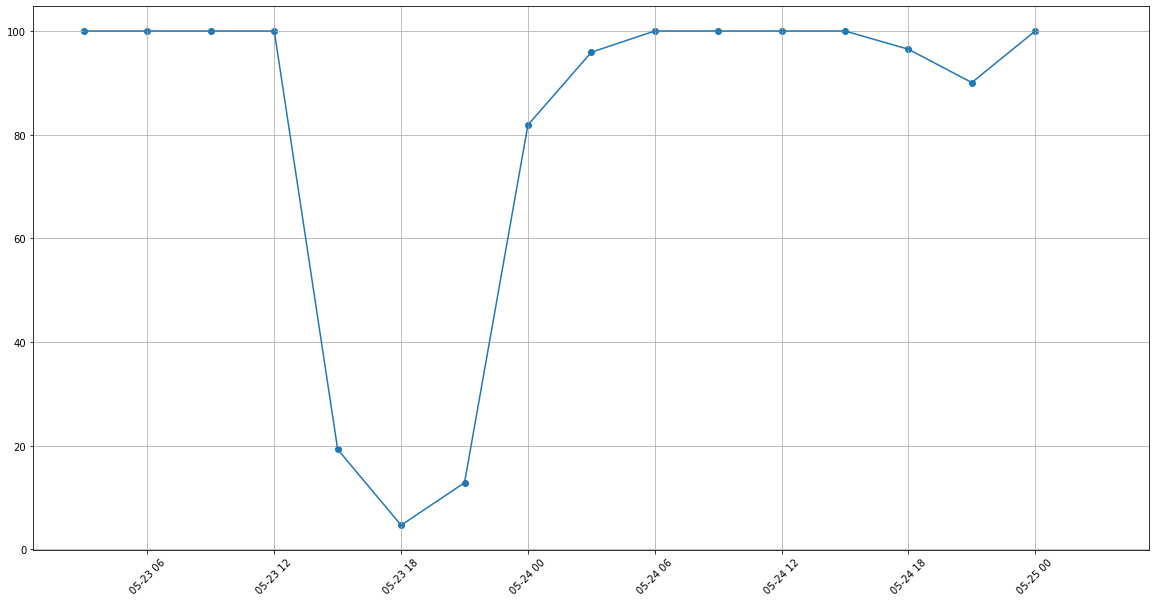

In [106]:
plt.figure(figsize=(20,10))
plt.plot(np.array(prob3h)[:,1],np.array(prob3h)[:,0])
plt.scatter(np.array(prob3h)[:,1],np.array(prob3h)[:,0])
plt.pĺot
plt.xticks(rotation=45);
plt.grid(True)